# Taxi Trip DataSet


## About Dataset

Kaggle Data Set: https://www.kaggle.com/datasets/anandshaw2001/taxi-dataset

This dataset represents a detailed compilation of trips made using yellow taxis in New York City. The data encapsulates a wide range of information, from pickup and drop_off times to fare amounts and payment types, offering a comprehensive view into urban mobility and the economics of taxi rides within the city. This dataset is invaluable for anyone interested in urban transportation trends, fare analysis, geographic movement patterns within New York City, and the study of temporal variations in taxi usage.

## Column Description:

VendorID: A code indicating the provider associated with the trip record.

tpep_pickup_datetime: The date and time when the meter was engaged.

tpep_dropoff_datetime: The date and time when the meter was disengaged.

passenger_count: The number of passengers in the vehicle. This is a driver-entered value.

trip_distance: The distance of the trip measured in miles.

RatecodeID: The final rate code in effect at the end of the trip.

store_and_fwd_flag: Indicates whether the trip record was held in vehicle memory before sending to the vendor, Y=store and forward, N=not a store and forward trip.

PULocationID: The Taxi and Limousine Commission (TLC) Taxi Zone ID for the pickup location.

DOLocationID: The Taxi and Limousine Commission (TLC) Taxi Zone ID for the dropoff location.

payment_type: A numeric code signifying how the passenger paid for the trip.

fare_amount: The time-and-distance fare calculated by the meter.

extra: Miscellaneous extras and surcharges.

mta_tax: $0.50 MTA tax that is automatically triggered based on the metered rate in use.

tip_amount: Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.

tolls_amount: Total amount of all tolls paid in trip.

improvement_surcharge: $0.30 improvement surcharge assessed trips at the flag drop. The surcharge began in 2015.

total_amount: The total amount charged to passengers. Does not include cash tips.

congestion_surcharge: A surcharge applied on trips that start, end, or pass through certain areas at specific times.



Usability
10.00

License
CC0: Public Domain

Expected update frequency
Never


To Standardize the name version: driscribe proyect, date of upload and version 

Example: taxidata_18042024_v01

In [4]:
# Import library for analysis

import numpy as np # Algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #Chart
import seaborn as sns # Analisis
import os # File Manager
from datetime import datetime # Date Manipulation

## Read Data Set and Create copy

In [5]:
# Read Data Set
df_original = pd.read_csv('/kaggle/input/taxi-dataset/Taxi Datset.csv')

# copy data frame
taxi_data = pd.DataFrame(df_original)
pd.options.display.float_format = '{:.2f}'.format

# obtain general info of Taxi data set
taxi_data.info()

/tmp/ipykernel_33/2993339942.py:3: DtypeWarning: Columns (0,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv('/kaggle/input/taxi-dataset/Taxi Datset.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11916667 entries, 0 to 11916666
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               object 
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           float64
 8   DOLocationID           float64
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(14), object(4)
memory usage: 1.6+ GB


In [6]:
# Obtain drecription of float columns for search for Irregularities

taxi_data.describe()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,11825214.00,11916662.00,11825214.00,11916662.00,11916662.00,11825214.00,11916662.00,11916662.00,11916662.00,11916662.00,11916662.00,11916662.00,11916662.00,11916662.00
mean,1.51,2.88,1.06,164.73,162.71,1.27,12.64,1.10,0.49,2.21,0.34,0.30,18.61,2.29
std,1.15,62.01,0.80,65.49,69.79,0.47,11.93,1.26,0.07,2.72,1.73,0.03,14.55,0.72
min,0.00,-30.62,1.00,1.00,1.00,1.00,-1238.00,-27.00,-0.50,-93.00,-38.23,-0.30,-1242.30,-2.50
25%,1.00,0.96,1.00,132.00,113.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,11.16,2.50
50%,1.00,1.60,1.00,162.00,162.00,1.00,9.00,0.50,0.50,1.96,0.00,0.30,14.30,2.50
75%,2.00,2.90,1.00,234.00,234.00,2.00,14.00,2.50,0.50,2.86,0.00,0.30,19.80,2.50
max,9.00,210240.07,99.00,265.00,265.00,5.00,4265.00,113.01,39.51,1100.00,925.50,0.30,4268.30,2.75


## Data cleaning process

### Remove Negatives numbers

In the previous graph, we can see negative in some colums, indicating a data capture error. We will count how many data points have this anomaly, and if there are several, they will be removed.

In [11]:
# Remove rows with negative value

taxi_clean01 = taxi_data[(taxi_data['extra'] >= 0) &
                       (taxi_data['fare_amount'] >= 0) &
                       (taxi_data['mta_tax'] >= 0) &
                       (taxi_data['tolls_amount'] >= 0) &
                       (taxi_data['improvement_surcharge'] >= 0)]
taxi_clean01.info()
taxi_clean01.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 11879679 entries, 0 to 11916661
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               object 
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           float64
 8   DOLocationID           float64
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(14), object(4)
memory usage: 1.7+ GB


,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,11788310.00,11879679.00,11788310.00,11879679.00,11879679.00,11788310.00,11879679.00,11879679.00,11879679.00,11879679.00,11879679.00,11879679.00,11879679.00,11879679.00
mean,1.51,2.89,1.06,164.74,162.72,1.26,12.72,1.11,0.50,2.22,0.34,0.30,18.72,2.30
std,1.15,62.11,0.80,65.49,69.79,0.46,11.79,1.25,0.05,2.72,1.73,0.01,14.38,0.68
min,0.00,-30.62,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.96,1.00,132.00,113.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,11.16,2.50
50%,1.00,1.60,1.00,162.00,162.00,1.00,9.00,0.50,0.50,1.96,0.00,0.30,14.30,2.50
75%,2.00,2.90,1.00,234.00,234.00,2.00,14.00,2.50,0.50,2.90,0.00,0.30,19.82,2.50
max,9.00,210240.07,99.00,265.00,265.00,5.00,4265.00,113.01,39.51,1100.00,925.50,0.30,4268.30,2.75


The 39,317 entries with negative values were removed due to suspicion of data capture errors to avoid affecting the analysis.

### Remove trips with 
##### passenger_count = 0 
##### trip_distance = 0 or less of 0

In [18]:
taxi_clean02 = taxi_clean01[(taxi_clean01['passenger_count'] > 0) &
                        (taxi_clean01['trip_distance'] > 0)]

taxi_data2 = pd.DataFrame(taxi_clean02)
taxi_data2.info()
taxi_data2.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 11453348 entries, 0 to 11916661
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               object 
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           float64
 8   DOLocationID           float64
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(14), object(4)
memory usage: 1.6+ GB


,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,11453348.00,11453348.00,11453348.00,11453348.00,11453348.00,11453348.00,11453348.00,11453348.00,11453348.00,11453348.00,11453348.00,11453348.00,11453348.00,11453348.00
mean,1.54,2.86,1.04,165.02,162.88,1.26,12.41,1.08,0.50,2.22,0.33,0.30,18.43,2.33
std,1.14,3.72,0.56,65.30,69.62,0.45,11.10,1.24,0.03,2.65,1.71,0.01,13.78,0.63
min,1.00,0.01,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.98,1.00,132.00,113.00,1.00,6.50,0.00,0.50,0.00,0.00,0.30,11.16,2.50
50%,1.00,1.60,1.00,162.00,162.00,1.00,9.00,0.50,0.50,1.96,0.00,0.30,14.30,2.50
75%,2.00,2.90,1.00,234.00,234.00,2.00,13.50,2.50,0.50,2.95,0.00,0.30,19.56,2.50
max,9.00,369.94,99.00,265.00,265.00,4.00,4265.00,113.01,39.51,1100.00,925.50,0.30,4268.30,2.75


463,313 trips were deleted with a distance of 0 or lower or with 0 passengers aboard.

### Search for columns with unique values

In [17]:
for column in taxi_data2.columns:
    unique_values = taxi_data2[column].unique()
    print(f"Unique Value '{column}': {unique_values}")

Unique Value 'VendorID': [1.0 2.0 '2' '1']
Unique Value 'tpep_pickup_datetime': ['01/01/2020 12:28:15 AM' '01/01/2020 12:35:39 AM'
 '01/01/2020 12:47:41 AM' ... '02/26/2020 09:17:43 PM'
 '02/26/2020 09:38:38 PM' '02/26/2020 09:02:48 PM']
Unique Value 'tpep_dropoff_datetime': ['01/01/2020 12:33:03 AM' '01/01/2020 12:43:04 AM'
 '01/01/2020 12:53:52 AM' ... '02/26/2020 09:45:58 PM'
 '02/26/2020 09:49:58 PM' '02/26/2020 09:20:27 PM']
Unique Value 'passenger_count': [1. 2. 3. 6. 4. 5. 8. 9. 7.]
Unique Value 'trip_distance': [ 1.2   0.6   0.8  ... 50.37 65.32 65.8 ]
Unique Value 'RatecodeID': [ 1.  5.  3.  2.  4. 99.  6.]
Unique Value 'store_and_fwd_flag': ['N' 'Y']
Unique Value 'PULocationID': [238. 239.   7. 246. 163. 161.  43. 143. 211. 234. 138. 170. 236.  50.
 142. 237.  24. 232.  79. 233. 148. 144. 229.  41.  48.  95. 141.  90.
 166. 249.  87. 113. 107. 185. 162. 189. 140. 262. 263. 151. 231.  40.
 261. 137. 158. 181. 132.  68. 164. 114. 125.  75. 255. 129.  93. 226.
 260. 209.  65. 11

##### Not columns with unique values

### Spli date_time columns to analyse by separate

##### "tpep_pickup_datetime" into "date_pickup", "time_pickup" and "day_pickup"
##### "tpep_pickup_dropoff" into "date_dropoff" and "time_dropoff"

In [33]:
taxi_data2['tpep_pickup_datetime'] = pd.to_datetime(taxi_data2['tpep_pickup_datetime'])

# Create new colums one for date ones for time pickup
taxi_data2['date_pickup'] = taxi_data2['tpep_pickup_datetime'].dt.strftime('%Y-%m-%d')
taxi_data2['time_pickup'] = taxi_data2['tpep_pickup_datetime'].dt.strftime('%H:%M:%S')
taxi_data2['day_pickup'] = taxi_data2['tpep_pickup_datetime'].dt.day_name()

In [35]:
taxi_data2['tpep_dropoff_datetime'] = pd.to_datetime(taxi_data2['tpep_dropoff_datetime'])

# Create new colums one for date ones for time dropoff
taxi_data2['date_dropoff'] = taxi_data2['tpep_dropoff_datetime'].dt.strftime('%Y-%m-%d')
taxi_data2['time_dropoff'] = taxi_data2['tpep_dropoff_datetime'].dt.strftime('%H:%M:%S')

In [43]:
taxi_data2.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,time_pickup,date_pickup,date_dropoff,time_dropoff,day_pickup
0,1.00,1.00,1.20,1.00,N,238.00,239.00,1.00,6.00,3.00,...,1.47,0.00,0.30,11.27,2.50,00:28:15,2020-01-01,2020-01-01,00:33:03,Wednesday
1,1.00,1.00,1.20,1.00,N,239.00,238.00,1.00,7.00,3.00,...,1.50,0.00,0.30,12.30,2.50,00:35:39,2020-01-01,2020-01-01,00:43:04,Wednesday
2,1.00,1.00,0.60,1.00,N,238.00,238.00,1.00,6.00,3.00,...,1.00,0.00,0.30,10.80,2.50,00:47:41,2020-01-01,2020-01-01,00:53:52,Wednesday
3,1.00,1.00,0.80,1.00,N,238.00,151.00,1.00,5.50,0.50,...,1.36,0.00,0.30,8.16,0.00,00:55:23,2020-01-01,2020-01-01,01:00:14,Wednesday
5,2.00,1.00,0.03,1.00,N,7.00,193.00,2.00,2.50,0.50,...,0.00,0.00,0.30,3.80,0.00,00:09:44,2020-01-01,2020-01-01,00:10:37,Wednesday


## Data Analyze

### The busiest hour

/tmp/ipykernel_33/3158940197.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  taxi_data2['hour_pickup'] = pd.to_datetime(taxi_data2['time_pickup']).dt.hour


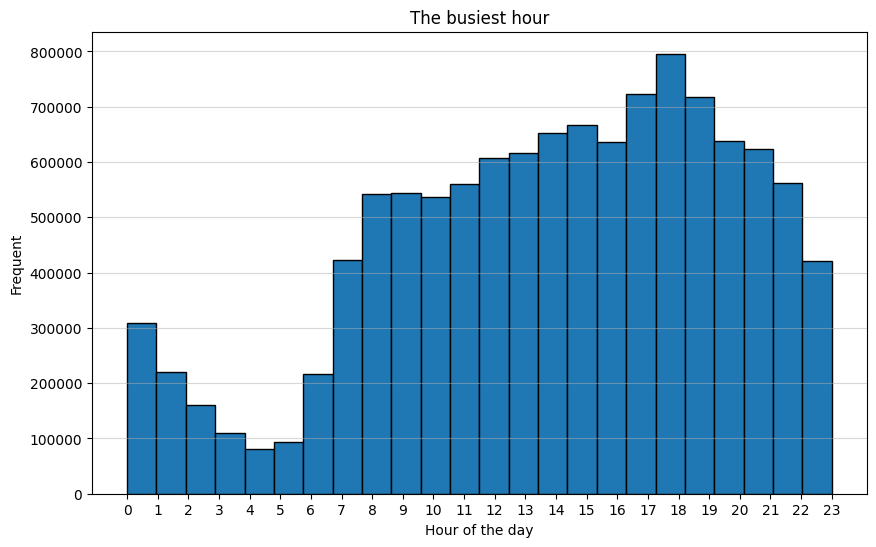

In [49]:
taxi_data2['hour_pickup'] = pd.to_datetime(taxi_data2['time_pickup']).dt.hour

# Create histogram of hour
plt.figure(figsize=(10, 6))
plt.hist(taxi_data2['hour_pickup'], bins=24, edgecolor='black')  # Use 24 bins to represent the hour of the day
plt.xlabel('Hour of the day')
plt.ylabel('Frequent')
plt.title('The busiest hour')
plt.xticks(range(0, 24))  # Set the x-axis ticks to represent each hour of the day.
plt.grid(axis='y', alpha=0.5)  # Show grid
plt.show()

### Analyze more frecuent day of the week

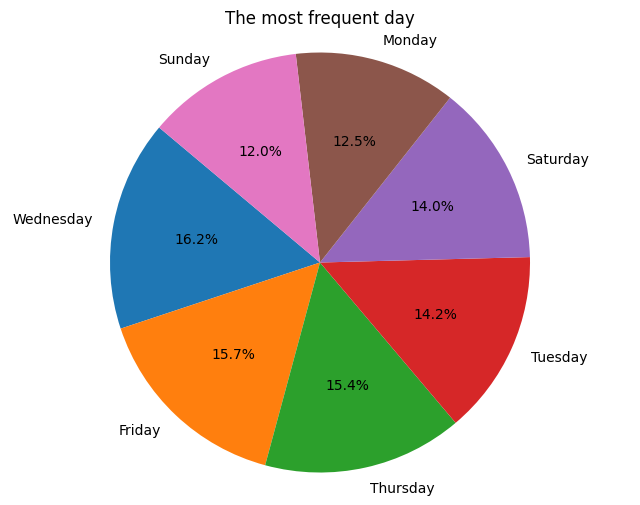

In [48]:
day_counts = taxi_data2['day_pickup'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('The most frequent day')
plt.axis('equal') 
plt.show()

### 

### The busiest month

##### The database only contains records from January and February of 2020

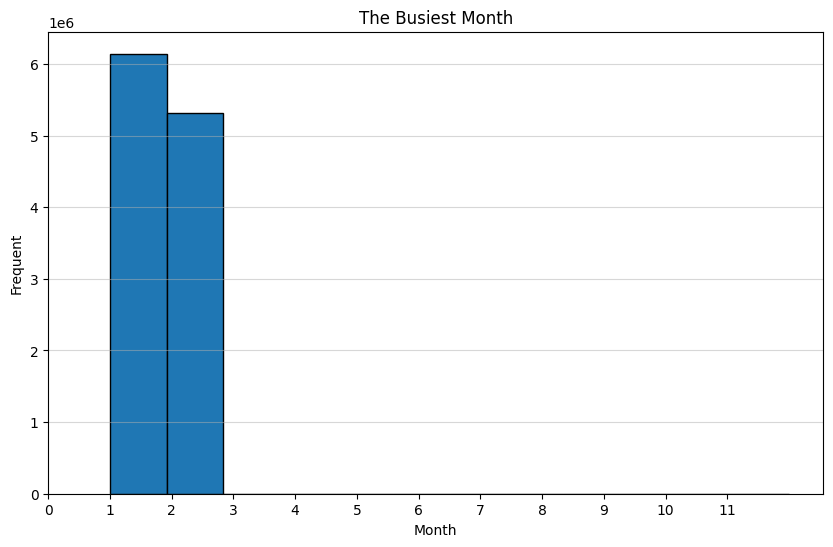

In [51]:
# Convert the date column to datetime if it's not already
taxi_data2['date_pickup'] = pd.to_datetime(taxi_data2['date_pickup'])

# Extract the month from each date
taxi_data2['month_pickup'] = taxi_data2['date_pickup'].dt.month

# Count observations for each month
busy_months = taxi_data2['month_pickup'].value_counts()

# Create histogram of hour
plt.figure(figsize=(10, 6))
plt.hist(taxi_data2['month_pickup'], bins=12, edgecolor='black')  # Use 12 bins to represent the month
plt.xlabel('Month')
plt.ylabel('Frequent')
plt.title('The Busiest Month')
plt.xticks(range(0, 12))  # Set the x-axis ticks to represent each hour of the day.
plt.grid(axis='y', alpha=0.5)  # Show grid
plt.show()

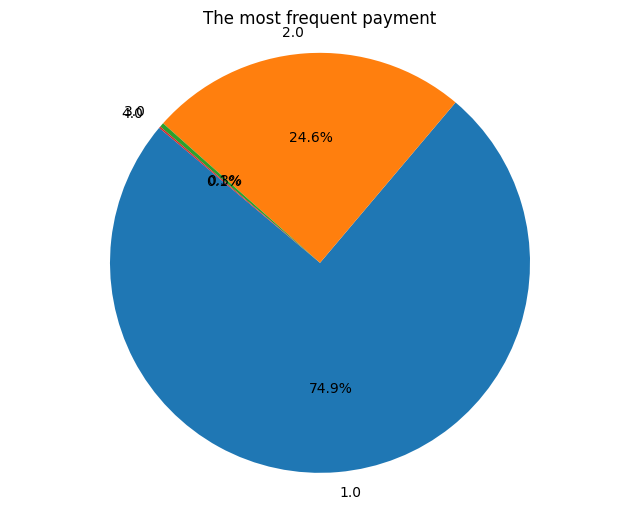

In [54]:
payment_counts = taxi_data2['payment_type'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('The most frequent payment')
plt.axis('equal') 
plt.show()

In [58]:
data_mean_data = ['passenger_count', 'trip_distance', 'tip_amount', 'total_amount']
mean_columns = taxi_data2[data_mean_data].mean()

print(mean_columns)

passenger_count    1.54
trip_distance      2.86
tip_amount         2.22
total_amount      18.43
dtype: float64


# Conclution

### After an analysis of 11,453,348 trips In January and February. it can be concluded that:

### Average trip: 
##### Average number of passengers: 1.54
##### Average trip distance: 2.86 milles
##### Average tip: USD 2.22
##### Average total amount: USD 18.43. 
### Trips are more frequent during the day from 8 to 21 hours with a slight increase from 15 to 19 hours and
### The most frequent day are from Wednesday to Friday.
### The preferred payment method is credit card and cash.